# Aspectos prácticos de las redes neuronales

## Resulto por: Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Sistemas Cognitivos Artificiales"

En este segundo trabajo, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [1]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Obtención de los datos y pre-processing

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

#### **Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación **

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [3]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]

## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1**: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [4]:
# Preparación de los datos. Se convierte cada imagen (matriz de 28x28) en un vector (dimensión 28x28 = 784)
#  para utilizarlo como entrada en nuestra red neuronal
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Definimos nuestra red neuronal **model_sigmoid** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **sigmoid** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es la inicialización por defecto:
- **Glorot Uniform**

Además, el optimizador es:
- **SGD** con los parámetros por defecto

In [5]:
#Definición del modelo de la NN con sigmoid
model_sigmoid = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28,28,1)),       # Transforms 28x28 pixels images into 784 array
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.sigmoid, input_dim=784), # 128 neurons (sigmoid) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.sigmoid),  # 64 neurons (sigmoid)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_sigmoid.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_sigmoid.compile(optimizer="sgd",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_sigmoid = model_sigmoid.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=64,
                                    validation_split=0.2      # Validation set 20%
                                    #, verbose=0              # Para no llenar el log con info del entrenamiento
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 60us/sample - loss: 2.3130 - accuracy: 0.0994 - val_loss: 2.2830 - val_accuracy: 0.1040
Epoch 2/20
48000/48000 [==============================] - 4s 73us/sample - loss: 2.2726 - accuracy: 0.1411 - val_loss: 2.2621 - val_accuracy: 0.2329
Epoch 3/20
48000/48000 [========

Los resultados de **accuracy** y **loss**, tanto para el train_set como para el validation_set se presentan de manera numérica en la celda anterior, junto con todos el proceso de entrenamiento. Además, gracias a las funciones provistas, se presentan los resultados de manera gráfica para apreciar la evolución, tanto de la accuracy como del loss, en función de las epochs ejecutadas.

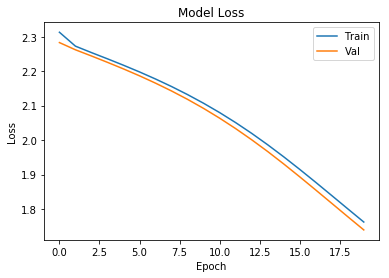

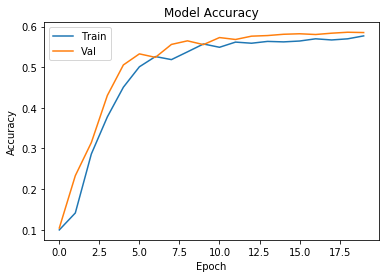

In [6]:
plot_loss(history_sigmoid)
plot_acc(history_sigmoid)

Definimos nuestra red neuronal **model_base** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ReLU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es la inicialización por defecto:
- **Glorot Uniform**

Además, el optimizador es:
- **SGD** con los parámetros por defecto

Con respecto al modelo anterior, solamente cambia la función de activación, manteniendo el resto de características.
Este modelo nos va a servir de base para las comparaciones posteriores.

In [7]:
#Definición del modelo de la NN con ReLU
model_base = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784), # 128 neurons (relu) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # 64 neurons (relu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_base.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_base.compile(optimizer="sgd",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_base = model_base.fit(x_train, y_train,
                              epochs=20,
                              batch_size=64,
                              validation_split=0.2      #Validation set 20%
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/sample - loss: 1.9506 - accuracy: 0.3958 - val_loss: 1.6209 - val_accuracy: 0.5919
Epoch 2/20
48000/48000 [==============================] - 2s 47us/sample - loss: 1.4000 - accuracy: 0.6251 - val_loss: 1.2005 - val_accuracy: 0.6672
Epoch 3/20
48000/48000 [======

A simple vista, en función de los resultados de **accuracy** y **loss** tanto para el train_set como para el validation_set se puede comprobar un mejor desempeño utilizando ReLU que el desempeño utilizando sigmoid. Nuevamente, gracias a las funciones provistas, se presentan los resultados de manera gráfica para apreciar la evolución, tanto de la accuracy como del loss, en función de las epochs ejecutadas, y una comparación entre las dos funciones de activación.

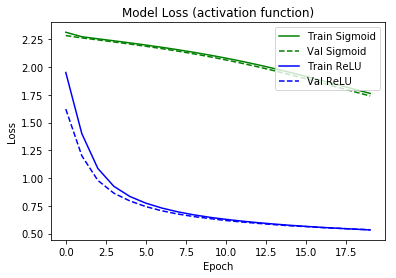

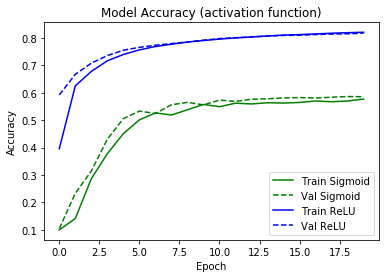

In [8]:
plot_compare_losses(history_sigmoid, history_base, 
                    name1="Sigmoid", name2="ReLU", 
                    title="Model Loss (activation function)")
plot_compare_accs(history_sigmoid, history_base, 
                  name1="Sigmoid", name2="ReLU", 
                  title="Model Accuracy (activation function)")

Se comprueba lo revisado en la teoría: la función de activación ReLU al no saturar el régimen positivo (cosa que si pasa con la función de activación sigmoid) tiene un mejor desempeño al entrenar redes neuronales. Esto se debe a que las unidades sigmoid saturadas "matan" los gradientes (pendiente nula, entonces gradiente cero).

En cuanto a la velocidad de entrenamiento o convergencia, no se aprecia mayor diferencia. Esto se debe a que el tamaño de la red es relativamente pequeño y relativamente sencillo de entrenar. En la teoría se mencionó que ReLU tiene una relación 6:1 en velocidad de convergencia de SGD comparada con sigmoid.

Desde luego, existen otras funciones de activación como: TanH, PReLU, ELU, etc.

A continuación se presenta un modelo que utiliza ELU como función de activación.

Definimos nuestra red neuronal **model_elu** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ELU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es la inicialización por defecto:
- **Glorot Uniform**

Además, el optimizador es:
- **SGD** con los parámetros por defecto

In [9]:
#Definición del modelo de la NN con Tanh
model_elu = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.elu, input_dim=784), # 128 neurons (elu) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.elu),  # 64 neurons (elu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_elu.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_elu.compile(optimizer="sgd",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_elu = model_elu.fit(x_train, y_train,
                            epochs=20,
                            batch_size=64,
                            validation_split=0.2      #Validation set 20%
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/sample - loss: 1.6184 - accuracy: 0.5232 - val_loss: 1.1958 - val_accuracy: 0.6690
Epoch 2/20
48000/48000 [==============================] - 2s 51us/sample - loss: 1.0548 - accuracy: 0.6894 - val_loss: 0.9349 - val_accuracy: 0.7167
Epoch 3/20
48000/48000 [======

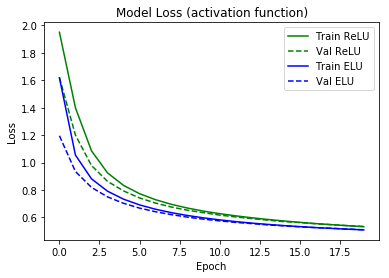

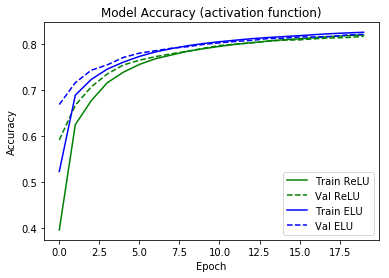

In [10]:
plot_compare_losses(history_base, history_elu, 
                    name1="ReLU", name2="ELU", 
                    title="Model Loss (activation function)")
plot_compare_accs(history_base, history_elu, 
                  name1="ReLU", name2="ELU", 
                  title="Model Accuracy (activation function)")

La función de activación ELU intenta resolver el problema de las activaciones no centradas en cero (caso de ReLU). Podemos observar que, si bien al principio ELU tiene un desempeño mejor que ReLU, alrededor de las 10 epochs el resultado es bastante cercano entre ambos modelos con distinta función de activación.

Un resultado del 82% de accuracy es bastante aceptable, sobretodo si lo comparamos con los resultados obtenidos en la anterior práctica (modelo similar al planteado con función de activación sigmoid), comprobando el motivo por el cual **ReLU** es ampliamente utilizado en este campo.

Adicionalmente, hasta ahora modificando las funciones de activación, se puede apreciar que no existen casos de overfitting ya que los resultados del train_set y del validation_set son muy cercanos.

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2**: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

El **model_base** utiliza la inicialización por defecto **Glorot Uniform** por lo que, como se mencionó anteriormente, ese modelo nos servirá para la comparación a continuación.

Definimos nuestra red neuronal **model_zeros** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ReLU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es con ceros:
- **Zeros** kernel_initializer='zeros'

Además, el optimizador es:
- **SGD** con los parámetros por defecto

In [11]:
#Definición del modelo de la NN con ReLU
model_zeros = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784, kernel_initializer='zeros'),
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='zeros'),  # 64 neurons (relu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer='zeros')   # 10-node softmax layer in %
])

model_zeros.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_zeros.compile(optimizer="sgd",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_zeros = model_zeros.fit(x_train, y_train,
                                epochs=20,
                                batch_size=64,
                                validation_split=0.2      #Validation set 20%
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/sample - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 2/20
48000/48000 [==============================] - 2s 51us/sample - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0957
Epoch 3/20
48000/48000 [======

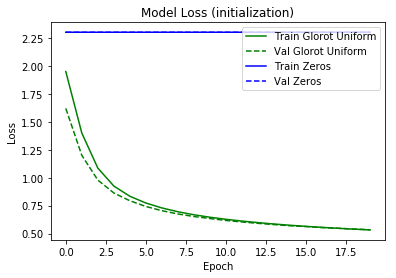

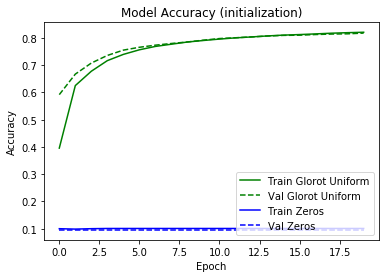

In [12]:
plot_compare_losses(history_base, history_zeros, 
                    name1="Glorot Uniform", name2="Zeros", 
                    title="Model Loss (initialization)")
plot_compare_accs(history_base, history_zeros, 
                  name1="Glorot Uniform", name2="Zeros", 
                  title="Model Accuracy (initialization)")

Se aprecia claramente que al realizar la inicialización de los parámetros en cero la red neuronal no se entrena (accuracy probabilística de 10% - 10 clases). Esto se debe a que en el proceso de backpropagation todos los nodos tendrían el mismo gradiente, por lo que es absolutamente necesario un nivel de asimetría en la inicialización.

Definimos nuestra red neuronal **model_gauss** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ReLU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es con una variable aleatoria normal (Gaussiana):
- **random_normal** kernel_initializer='random_normal'

Además, el optimizador es:
- **SGD** con los parámetros por defecto

In [13]:
#Definición del modelo de la NN con ReLU
model_gauss = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784, kernel_initializer='random_normal'), 
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='random_normal'),  # 64 neurons (relu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer='random_normal')   # 10-node softmax layer in %
])

model_gauss.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_gauss.compile(optimizer="sgd",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_gauss = model_gauss.fit(x_train, y_train,
                                epochs=20,
                                batch_size=64,
                                validation_split=0.2      #Validation set 20%
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/sample - loss: 2.2859 - accuracy: 0.1274 - val_loss: 2.2545 - val_accuracy: 0.1871
Epoch 2/20
48000/48000 [==============================] - 3s 52us/sample - loss: 2.2190 - accuracy: 0.2501 - val_loss: 2.1743 - val_accuracy: 0.3133
Epoch 3/20
48000/48000 [======

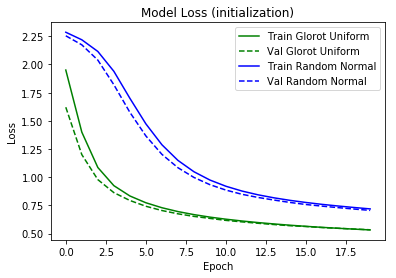

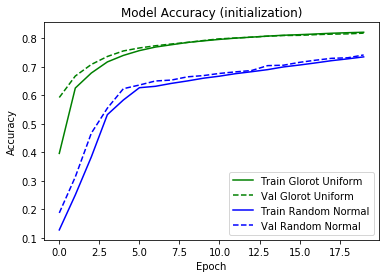

In [14]:
plot_compare_losses(history_base, history_gauss, 
                    name1="Glorot Uniform", name2="Random Normal", 
                    title="Model Loss (initialization)")
plot_compare_accs(history_base, history_gauss, 
                  name1="Glorot Uniform", name2="Random Normal", 
                  title="Model Accuracy (initialization)")

Al inicializar los parámetros con una variable aleatoria normal se rompe la simetría mencionada anteriormente y ya existe entrenamiento en la red. Desde luego, el desempeño es notablemente mejor cuando se realiza la inicialización utilizando los valores por defecto de Keras (Glorot Uniform) que es la inicialización uniforme de Xavier revisada en la teoría. Esta iniciaización busca que la varianza de salida de una neurona sea igual a la varianza de entrada, haciendo que todas las neuronas tengan aproximadamente la misma distribución de salida, acelerando la convergencia al entrenar.

## 3. Optimizadores

**Ejercicio 3**: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

Definimos nuestra red neuronal **model_adam** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ReLU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es la inicialización por defecto:
- **Glorot Uniform**

Además, el optimizador es:
- **Adam** con los parámetros por defecto

In [15]:
#Definición del modelo de la NN con ReLU
model_adam = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784), # 128 neurons (relu) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # 64 neurons (relu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_adam.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_adam.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_adam = model_adam.fit(x_train, y_train,
                              epochs=20,
                              batch_size=64,
                              validation_split=0.2      #Validation set 20%
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.5346 - accuracy: 0.8142 - val_loss: 0.4139 - val_accuracy: 0.8526
Epoch 2/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3868 - accuracy: 0.8610 - val_loss: 0.3851 - val_accuracy: 0.8624
Epoch 3/20
48000/48000 [======

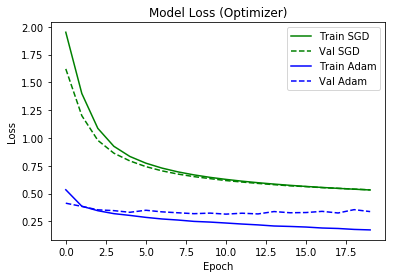

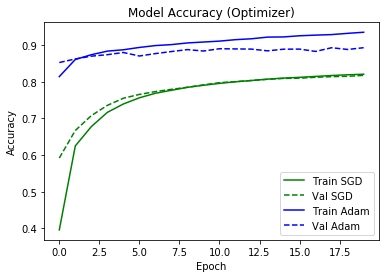

In [16]:
plot_compare_losses(history_base, history_adam, 
                    name1="SGD", name2="Adam", 
                    title="Model Loss (Optimizer)")
plot_compare_accs(history_base, history_adam, 
                  name1="SGD", name2="Adam", title="Model Accuracy (Optimizer)")

La velocidad de convergencia al utilizar el optimizador Adam es más rápida que al utilizar el optimizador SGD. Sin embargo, ya se pueden apreciar resultados interesantes para comentar. Utilizando Adam, a partir de la epoch 8 (aproximadamente), se aprecia una diferencia incremental entre los resultados del train_set y del validation_set, lo que significa que a partir de este punto la red presenta **overfitting**, lo cual siempre se trata de evitar.

Definimos nuestra red neuronal **model_RMSprop** con:
- una capa de entrada de dimensión 784 neuronas (28x28 píxeles de cada imagen)
- dos capas ocultas de 128 neuronas y 64 neuronas respectivamente (ambas utilizando **ReLU** como función de activación) 
- una capa de salida de 10 neuronas que son las clases a clasificar (utiliza **softmax** como función de activación)

La inicialización de los parámetros (pesos) de las capas es la inicialización por defecto:
- **Glorot Uniform**

Además, el optimizador es:
- **RMSprop** con los parámetros por defecto

In [17]:
#Definición del modelo de la NN con ReLU
model_RMSprop = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784), # 128 neurons (relu) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # 64 neurons (relu)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_RMSprop.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
model_RMSprop.compile(optimizer="RMSprop",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
history_RMSprop = model_RMSprop.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=64,
                                    validation_split=0.2      #Validation set 20%
)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0.5436 - accuracy: 0.8061 - val_loss: 0.4187 - val_accuracy: 0.8492
Epoch 2/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3871 - accuracy: 0.8598 - val_loss: 0.3726 - val_accuracy: 0.8666
Epoch 3/20
48000/48000 [======

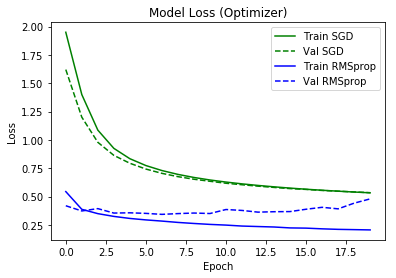

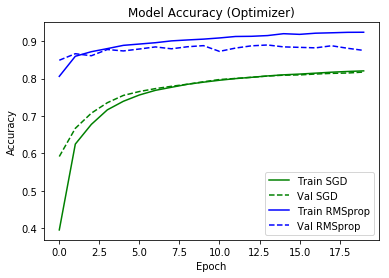

In [18]:
plot_compare_losses(history_base, history_RMSprop, 
                    name1="SGD", name2="RMSprop", 
                    title="Model Loss (Optimizer)")
plot_compare_accs(history_base, history_RMSprop, 
                  name1="SGD", name2="RMSprop", 
                  title="Model Accuracy (Optimizer)")

De igualmanera se aprecia una mejor velocidad de convergencia y mejor accuracy obtenido al utilizar RMSprop que en comparación con SGD. Desde luego, también se presenta a partir de la epoch 6 (aproximadamente) una diferencia incremental entre los resultados del train_set y del validation_set, indicando **overfitting**.

Si comparamos los modelos Adam y RMSprop, podemos ver que tienen un comportamiento muy similar, tanto en velocidad de convergencia, resultados de accuracy, e incluso mismo punto desde donde empieza a tener overfitting.

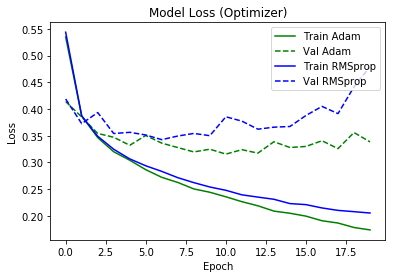

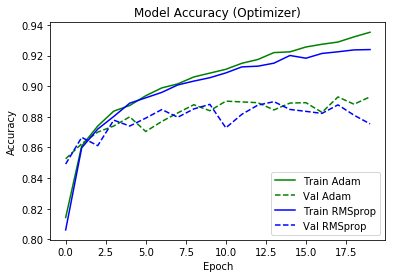

In [19]:
plot_compare_losses(history_adam, history_RMSprop, 
                    name1="Adam", name2="RMSprop", 
                    title="Model Loss (Optimizer)")
plot_compare_accs(history_adam, history_RMSprop, 
                  name1="Adam", name2="RMSprop", 
                  title="Model Accuracy (Optimizer)")

La brecha o diferencia puede parecer muy grande gráficamente, pero es necesario mencionar que se debe a la escala de la gráfica. En términos de porcentajes no hay diferencia mayor al 6%.

Justamente, para contrarrestar el overfitting mencionado, se hace uso de estrategias de regularización vistas a continuación.

## 4. Regularización y red final

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

El modelo definido y descrito en la sección anterior con optimizador Adam ya se acercaba a los requerimientos solicitados, con un accuracy en el train_test cercano a 94% y en el validation_set cercano a 89%. Personalmente, y en este particular caso, considero que esta diferencia (de aproximadamente el 5%) no representa un gran problema de overfitting, sino más bien que se consideraría la accuracy del validation_set (89%) como accuracy del modelo, y el desempeño esperado en el test_set. Sin embargo, con el objetivo de sintonizar de mejor manera la red neuronal y explorar estrategias de regularización se obtuvo el modelo presentado a continuación.

In [20]:
# Regularization L1
from keras import backend as K
def l1_reg(weight_matrix):                            #Probada pero no usada
    return 0.01 * K.sum(K.abs(weight_matrix))

#Definición del modelo de la NN final
model_final = tf.keras.Sequential([
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784), # 128 neurons (relu) + input 784 array
    tf.keras.layers.Dropout(0,5), #Optimization
    # Se define la siguiente capa oculta     
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0,5), #Optimization
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

model_final.summary()

#Definición del optimizador, función de pérdida y métrica de evaluación
#optimizer = tf.keras.optimizers.RMSprop(0.001)
#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_final.compile(optimizer=optimizer,
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con epochs y batch size
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-7, patience=4, 
                                           verbose=1, mode='auto', baseline=None, restore_best_weights=True)
history_final = model_final.fit(x_train, y_train,
                                epochs=50,
                                batch_size=64, #32, 128, 256
                                validation_split=0.2,     #Validation set 20%
                                callbacks=[monitor]
)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 69u

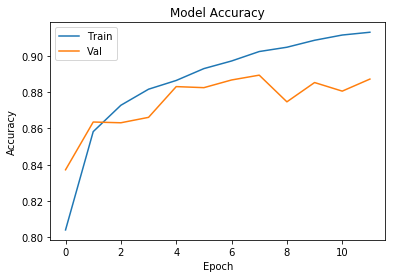

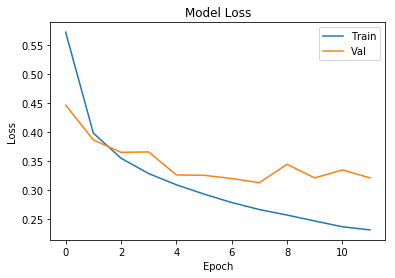

In [21]:
plot_acc(history_final)
plot_loss(history_final)

Comentando brevemente algunos elementos modificados:

* Número de capas y neuronas por capa: teniendo desde una sola capa oculta fully connected de 128 neuronas, hasta cuatro capas ocultas de hasta 256 y 512 neuronas (con capas dropout 0.5) se pudo apreciar resultados muy similares en donde solamente se mejoraba la accuracy del train_set, pero no la accuracy del validation_set.

* Optimizadores y sus parámetros: se probaron varios optimizadores y se modificaron sus parámetros (principalmente learning rate), entre ellos RMSprop, Adadelta, Adam, Adagrad. De igual manera se notaron ligeros cambios, sobretodo en las velocidades de convergencia, pero la accuracy del validation_set se mantuvo similar.

* Batch size: se trabajó con valores de 32, 64, 128 y 256. Nuevamente, sin mayor diferencia en los resultados.

* Unidades de activación: previamente ya se exploraron diferentes funciones de activación sigmoid, ReLU, tanh y elu. Se mantuvo ReLU aunque se obtuvieron resultados similares con ELU y tanh.

* Uso de capas dropout, regularización L2, regularización L1: se utilizó una capa dropout con 0.5 después de cada capa densa. También se definió una funición de regularización L1, sin embargo se presentó un mal desempeño al aplicarlo.

* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias): de igual manera se definió una función de early stopping de keras denominada **monitor**, la cual detiene el entrenamiento según los parámetros establecidos. Es decir, no ejecuta todas las epochs definidas, sino solamente hasta que ya no encuentre mejora notable, evitando así el overfitting.

* Batch normalization: no se aplicó.

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [22]:
# Evaluación del modelo
score = model_final.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3393 - accuracy: 0.8813


Podemos comprobar que efectivamente el valor de accuracy del test_set se encuentra próximo al valor de la accuracy del validation_set obtenido previamente. Este valor se encuentra alrededor del 89%, teniendo una mejora considerable en comparación con el modelo presentado en la práctica anterior (alrededor del 60%).

Desde luego, el desempeño puede ser mejorado aún más, si utilizamos otras topologías de redes neuronales, por ejemplo, redes neuronales convolucionales, llegando fácilmente al 93% (https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb)